In [1]:
import geopandas as gpd
import fiona
import contextily as ctx
import geopandas as gpd
import pandas as pd
from shapely import geometry
import matplotlib.pyplot as plt

In [2]:
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
planning = gpd.read_file('Documents/Geospatial/GEOSPATIAL/subzone-census-2010/Subzone_Census2010.kml', driver='KML')
planning["SubzoneCode"] = planning.Description.str.extract("Subzone Code.*?<td>(.*?)</td>")
planning["Planning"] = planning.Description.str.extract("Planning Area Name.*?<td>(.*?)</td>")
planning["PlanningCode"] = planning.Description.str.extract("Planning Area Code.*?<td>(.*?)</td>")
planning["Region"] = planning.Description.str.extract("Region Name.*?<td>(.*?)</td>")
planning["RegionCode"] = planning.Description.str.extract("Region Code.*?<td>(.*?)</td>")
planning = planning.rename(columns={"Name":"Subzone"})
planning = planning.drop("Description",axis=1)
planning = planning[['Region', 'RegionCode', 'Planning', 'PlanningCode', 'Subzone', 'SubzoneCode', 'geometry']]

In [4]:
planning.Subzone.unique()

array(['MAXWELL', 'TANGLIN', 'BOULEVARD', 'SOMERSET', 'PASIR RIS TOWN',
       'MACPHERSON', 'GEYLANG EAST', 'ALJUNIED', 'KALLANG WAY',
       'DEFU INDUSTRIAL PARK', 'ROSYTH', 'LORONG AH SOO', 'TRAFALGAR',
       'TAI KENG', 'JURONG RIVER', 'YUHUA', 'INTERNATIONAL BUSINESS PARK',
       'JURONG PORT', 'TEBAN GARDENS', 'TOH GUAN',
       'JURONG REGIONAL CENTRE', 'BOON LAY', 'JURONG LAKE', 'CHIN BEE',
       'SAFTI', 'CENTRAL', 'HONG KAH', 'WENYA', 'YUNNAN', 'KIAN TECK',
       'TAMAN JURONG', 'BUGIS', 'CITY HALL', 'CLIFFORD PIER',
       'RAFFLES PLACE', 'CECIL', 'PHILLIP', 'DHOBY GHAUT', 'FORT CANNING',
       'CAIRNHILL', "MONK'S HILL", 'ORANGE GROVE', 'GOODWOOD PARK',
       "PEOPLE'S PARK", 'MARINA SOUTH', 'BRAS BASAH',
       'DT - TANJONG PAGAR', 'NEWTON CIRCUS', 'ISTANA NEGARA',
       'NORTH EASTERN ISLANDS', 'BALESTIER', 'ROCHOR CANAL',
       'SUNGEI ROAD', 'LITTLE INDIA', 'PATERSON', 'ONE TREE HILL',
       'LEONIE HILL', "PEARL'S HILL", 'CHINA SQUARE', 'CHINATOWN',
       

<AxesSubplot:>

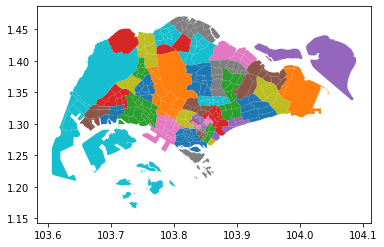

In [39]:
planning.plot(column="Planning")

In [31]:
rail = gpd.read_file('Documents/Geospatial/GEOSPATIAL/master-plan-2014-rail-line/G_MP14_RAIL_LI.kml', driver='KML')


<AxesSubplot:>

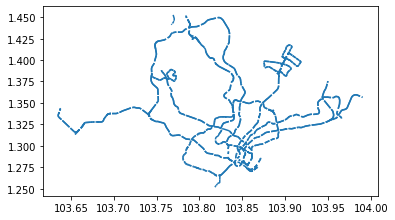

In [37]:
rail.plot()

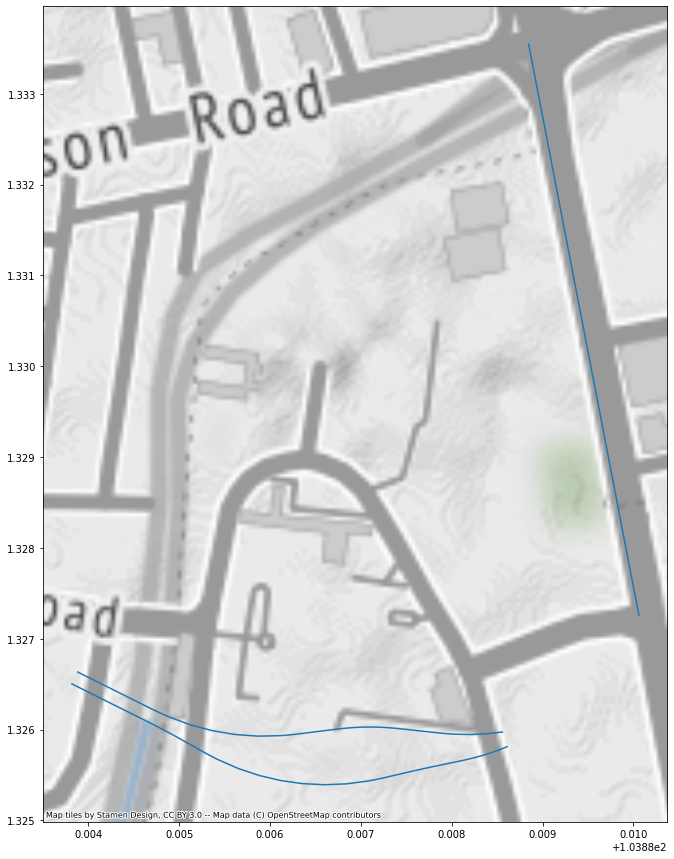

In [55]:
ax = rail[rail.geometry.apply(lambda x: x.within(planning.iloc[5].geometry))].plot(figsize=(15,15))
ctx.add_basemap(ax=ax, zoom=15, crs="EPSG:4326")

In [57]:
planning.head(60)

,Region,RegionCode,Planning,PlanningCode,Subzone,SubzoneCode,geometry
0,CENTRAL REGION,CR,DOWNTOWN CORE,DT,MAXWELL,DTSZ07,"MULTIPOLYGON Z (((103.84714 1.27976 0.00000, 1..."
1,CENTRAL REGION,CR,ORCHARD,OR,TANGLIN,ORSZ01,"MULTIPOLYGON Z (((103.82810 1.30460 0.00000, 1..."
2,CENTRAL REGION,CR,ORCHARD,OR,BOULEVARD,ORSZ02,"MULTIPOLYGON Z (((103.83661 1.30437 0.00000, 1..."
3,CENTRAL REGION,CR,ORCHARD,OR,SOMERSET,ORSZ03,"MULTIPOLYGON Z (((103.84125 1.30279 0.00000, 1..."
4,EAST REGION,ER,PASIR RIS,PR,PASIR RIS TOWN,PRSZ03,"MULTIPOLYGON Z (((103.95274 1.37505 0.00000, 1..."
5,CENTRAL REGION,CR,GEYLANG,GL,MACPHERSON,GLSZ02,"MULTIPOLYGON Z (((103.89096 1.32294 0.00000, 1..."
6,CENTRAL REGION,CR,GEYLANG,GL,GEYLANG EAST,GLSZ05,"MULTIPOLYGON Z (((103.90509 1.31760 0.00000, 1..."
7,CENTRAL REGION,CR,GEYLANG,GL,ALJUNIED,GLSZ04,"MULTIPOLYGON Z (((103.88972 1.30859 0.00000, 1..."
8,CENTRAL REGION,CR,GEYLANG,GL,KALLANG WAY,GLSZ01,"MULTIPOLYGON Z (((103.88142 1.32254 0.00000, 1..."
9,NORTH-EAST REGION,NER,HOUGANG,HG,DEFU INDUSTRIAL PARK,HGSZ06,"MULTIPOLYGON Z (((103.90200 1.35721 0.00000, 1..."
